# POSTTEST 5

## Nama : Wina Aulia Nugrasari
## NIM  : 2109106118

### Import library

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

In [61]:
df = pd.read_csv('Breast_Cancer.csv')
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


# A. SUPERVISED LEARNING

## Support Vector Classifier (dari SVM)

Pada binary classification, dua fitur kategorikal digunakan untuk memprediksi label (y). Fitur-fitur ini dipisahkan menjadi X (fitur) dan y (label) untuk membentuk model prediksi.

In [87]:
X = df[['Age', 'Tumor Size']]
y = df['Grade']

Memetakan kelas target ke label biner

In [63]:
y = np.where(y == '2', 1, -1)

Membagi data (split) ke train set dan test set

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Membuat objek classifier SVM

In [65]:
svm = SVC(kernel="rbf")

Melatih classifier dengan data train

In [66]:
svm.fit(X_train, y_train)

SVC()

Lakukan prediksi dengan SVC pada data pengujian

In [67]:
y_pred = svm.predict(X_test)

Menyimpan nilai support vectors dan indeksnya

In [68]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

Dalam plotting dengan Seaborn, tampilkan titik-titik support vector, garis decision boundary dengan meshgrid, serta label dan legenda.

D:\Praktikum\KB\posttest\posttest_kb\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


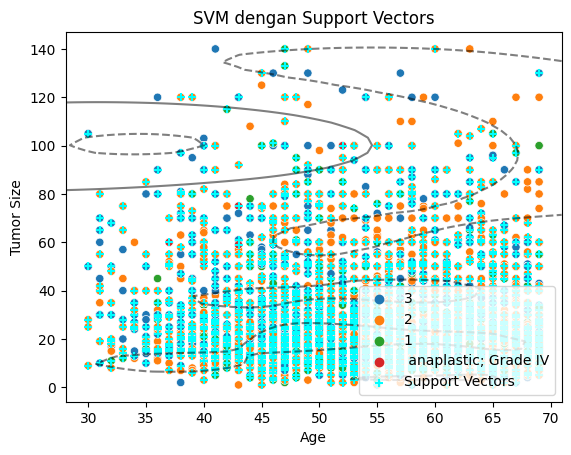

In [69]:
sns.scatterplot(x='Age', y='Tumor Size', hue='Grade', data=df)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('Age')
plt.ylabel('Tumor Size')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')
plt.show()

Melihat 4 nilai metriks dengan menggunakan library dari Scikit-Learn yaitu Classification Report.

In [70]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.58      0.01      0.03       486
           1       0.60      0.99      0.75       722

    accuracy                           0.60      1208
   macro avg       0.59      0.50      0.39      1208
weighted avg       0.59      0.60      0.46      1208



### Linear Regresion

Memisahkan fitur dan target dari dataset

In [71]:
X, y = df[['Tumor Size']], df['Age']

Membagi data fitur dan target menjadi data training

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

Membuat model regresi linear, melatih model dengan data training dan menggunakan model untuk membuat prediksi pada data test

In [73]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

Visualisasi hasil prediksi regresi linear pada data test yang membandingkan prediksi (garis ungu) dengan data asli (titik biru) untuk melihat sejauh mana model cocok dengan data aktual

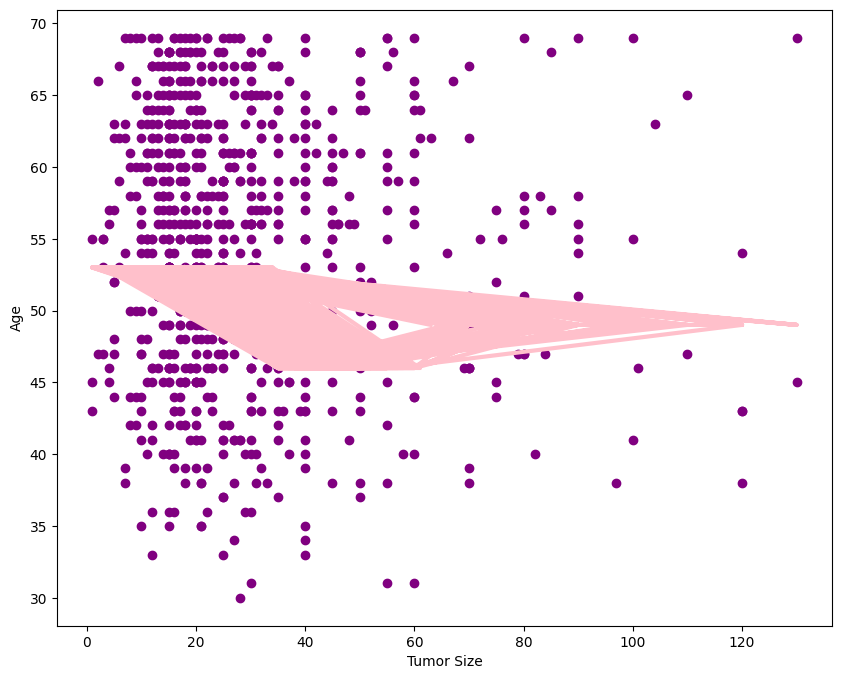

In [90]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='pink', linewidth=3)
plt.scatter(X_test, y_test, c='purple')
plt.xlabel("Tumor Size")
plt.ylabel("Age")
plt.show()

Membuat objek classifier SVM

In [75]:
svm = SVC(kernel="linear")

Melatih classifier dengan data train

In [76]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

Melakukan prediksi pada data uji menggunakan model dan menampilkan hasil prediksinya.

In [77]:
y_pred = svm.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 8.098136645962732
MSE : 94.99751552795031
RMSE : 9.746666893248703
R-Squared : -0.16773941433474504


# B. UNSUPERVISED LEARNING

## KMEANS

Menggunakan fitur X dan menentukan banyaknya kelompok atribut

In [91]:
X = df[["Tumor Size", "Age"]]
K = 2

Membuat awal K-Means dan mengajarinya dengan data X.

In [79]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

Menghasilkan label grup dari model, menambahkan kolom prediksi, dan mendapatkan pusat kelompok dari model tersebut.

In [92]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

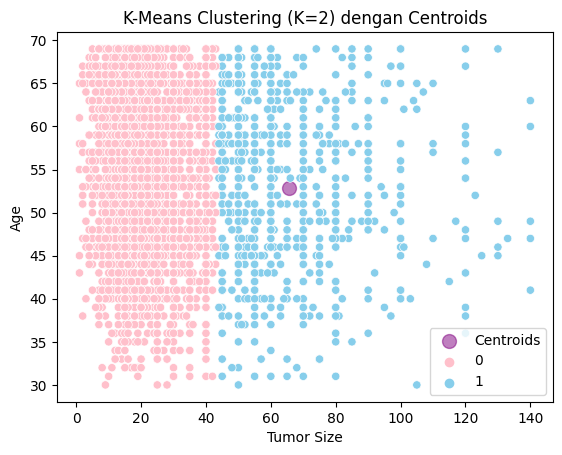

In [93]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='purple', s=100, label='Centroids')
sns.scatterplot(data=df, x="Tumor Size", y="Age", hue="cluster", palette=["pink", "skyblue"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Tumor Size")
plt.ylabel("Age")
plt.legend()
plt.show()

Membentuk tabel silang (crosstab) untuk membandingkan label kluster dengan label asli.

In [83]:
cross_tab = pd.crosstab(df["cluster"], df["Grade"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
Grade     anaplastic; Grade IV    1     2    3
cluster                                       
0                           10  462  1899  855
1                            9   81   452  256 



Menghitung dan mencetak nilai "Adjusted Rand Index (ARI)" yang mengukur sejauh mana clustering dengan algoritma K-Means

In [84]:
ari = adjusted_rand_score(df["Grade"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.00


Melakukan perhitungan dan mencetak skor "Normalized Mutual Information (NMI)" untuk mengevaluasi sejauh mana hasil pengelompokan menggunakan algoritma K-Means.

In [85]:
true_labels_num = df["Grade"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.00


Homogeneity, Completeness, dan V-Measure adalah metrik yang digunakan untuk menilai sejauh mana hasil pengelompokan mencocokkan label asli data dan seberapa baik pengelompokan tersebut dalam mengelompokkan data.

In [86]:
homogeneity = homogeneity_score(df["Grade"], cluster_labels)
completeness = completeness_score(df["Grade"], cluster_labels)
v_measure = v_measure_score(df["Grade"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.00
Completeness Score: 0.01
V-Measure Score: 0.00
